<a href="https://colab.research.google.com/github/CharlesCoster/ada-project-terrorism-impact/blob/master/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [46]:
terror_df = pd.read_csv('data/final_terrorism.csv',low_memory=False)
terror_df.head()

,eventid,iyear,imonth,iday,country_txt,city,region_txt,attacktype1_txt,attacktype2_txt,attacktype3_txt,targtype1_txt,targtype2_txt,weaptype1_txt,weaptype2_txt,weaptype3_txt,weaptype4_txt,gname,nkill,nkillter
0,197000000001,1970,7,2,Dominican Republic,Santo Domingo,Central America & Caribbean,Assassination,NaN,NaN,Private Citizens & Property,NaN,Unknown,NaN,NaN,NaN,MANO-D,1.0,NaN
1,197000000002,1970,0,0,Mexico,Mexico city,North America,Hostage Taking (Kidnapping),NaN,NaN,Government (Diplomatic),NaN,Unknown,NaN,NaN,NaN,23rd of September Communist League,0.0,NaN
2,197001000001,1970,1,0,Philippines,Unknown,Southeast Asia,Assassination,NaN,NaN,Journalists & Media,NaN,Unknown,NaN,NaN,NaN,Unknown,1.0,NaN
3,197001000002,1970,1,0,Greece,Athens,Western Europe,Bombing/Explosion,NaN,NaN,Government (Diplomatic),NaN,Explosives,NaN,NaN,NaN,Unknown,NaN,NaN
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),NaN,Incendiary,NaN,NaN,NaN,Unknown,NaN,NaN


In [12]:
def normalize(d, target=1.0):
    raw = sum(d.values())
    if raw != 0:
        factor = target/raw
    else: 
        factor = 0
    return {key:value*factor for key,value in d.items()}

In this part, we are trying to analyse the evolution of terrorism since 1970 :
- regions with the highest number of attaks per year
- weapon's type per year and region
- terrorist group across years

## Region terrorism across year

In [47]:
dict_region = {}
for year, group in terror_df.groupby('iyear'):
    dict_region[year] = {}
    for txt in ['region_txt']:
        regions = group[txt].value_counts().to_dict()
        # Keep region with the highest number of attacks on current year
        dict_region[year] = max(regions, key=regions.get)

# dict_region

As we can see, terrorism evolves a lot. In the following, we are focusing on different parts of the world:
- South Asia
- Middle East & North Africa
- South America
- Western Europe
- North America

### Number of attacks

In [8]:
regions = {}

for year, group in terror_df.groupby('iyear'):
    dict_region[year] = {}
    for txt in ['region_txt']:
        regions[year] = group[txt].value_counts().to_dict()

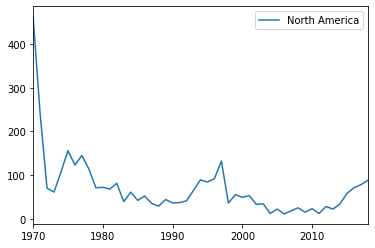

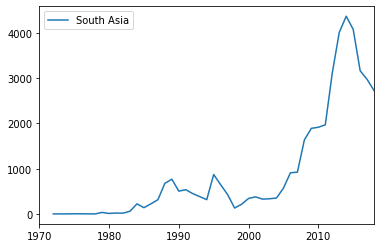

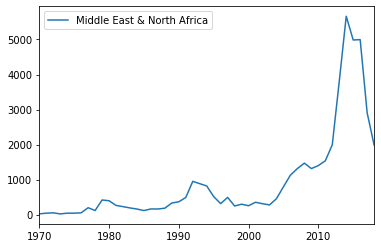

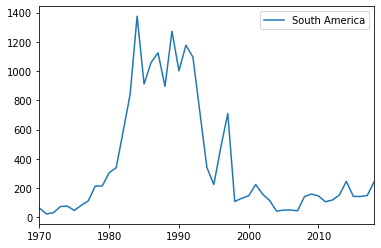

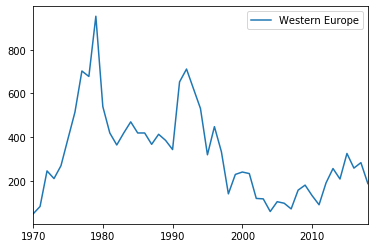

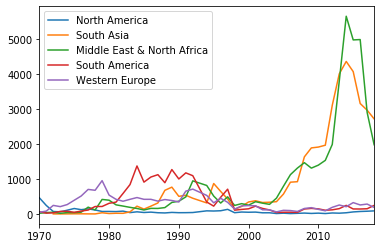

In [9]:
regions_df = pd.DataFrame(regions).transpose()
imp_regions = regions_df[['North America','South Asia', 'Middle East & North Africa', 'South America','Western Europe']]
for region in imp_regions.columns:
    imp_regions[region].plot(legend=True)
    plt.show()
    
imp_regions.plot(legend=True)
plt.show()

## Weapons

### North America

In [52]:
df = terror_df[terror_df.region_txt.isin(['North America'])]

In [53]:
dict_weapons = {}
for year, group in df.groupby('iyear'):
    dict_weapons[year] = {}
    for txt in ['weaptype1_txt','weaptype2_txt','weaptype3_txt']:
        weapons = group[txt].value_counts().to_dict()
        for weapon in weapons.keys():
            if weapon not in ['Unknown','Other'] and weapon in dict_weapons:
                dict_weapons[year][weapon] += weapons[weapon]
            elif weapon not in ['Unknown','Other']:
                dict_weapons[year][weapon] = weapons[weapon]

In [54]:
# for k in dict_weapons.keys():
#     dict_weapons[k] = normalize(dict_weapons[k])

weapons_df = pd.DataFrame(dict_weapons).transpose()
weapons_df.fillna(0,inplace=True)
weapons_df.head()

,Explosives,Incendiary,Firearms,Melee,Chemical,Sabotage Equipment,Fake Weapons,Biological,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
1970,1.0,2.0,6.0,1.0,2.0,2.0,1.0,0.0,0.0
1971,142.0,74.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1972,45.0,13.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
1973,20.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
1974,74.0,7.0,15.0,2.0,4.0,0.0,1.0,0.0,0.0


In [55]:
imp_weapons = weapons_df.columns[weapons_df.sum() > 50] # We keep only the weapons that are the more present

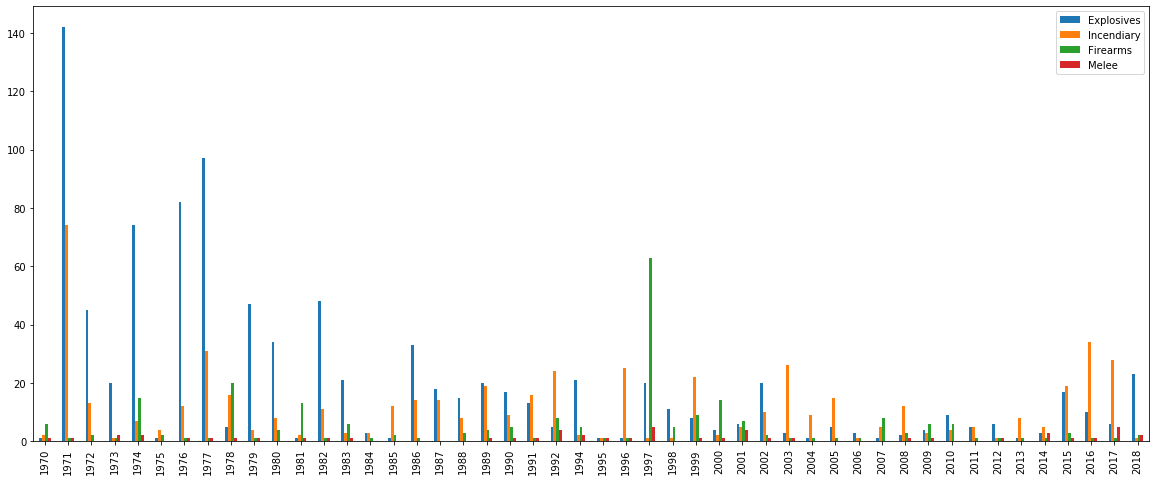

In [56]:
weapons_df[imp_weapons].plot(kind='bar', legend=True,figsize=(20,8))
plt.show()

### Western Europe

In [38]:
df = terror_df[terror_df.region_txt.isin(['Western Europe'])]

In [39]:
dict_weapons = {}
for year, group in df.groupby('iyear'):
    dict_weapons[year] = {}
    for txt in ['weaptype1_txt','weaptype2_txt','weaptype3_txt']:
        weapons = group[txt].value_counts().to_dict()
        for weapon in weapons.keys():
            if weapon not in ['Unknown','Other'] and weapon in dict_weapons:
                dict_weapons[year][weapon] += weapons[weapon]
            elif weapon not in ['Unknown','Other']:
                dict_weapons[year][weapon] = weapons[weapon]

In [40]:
# for k in dict_weapons.keys():
#     dict_weapons[k] = normalize(dict_weapons[k])

weapons_df = pd.DataFrame(dict_weapons).transpose()
weapons_df.fillna(0,inplace=True)
weapons_df.head()

,Firearms,Explosives,Incendiary,Chemical,Melee,Radiological,Biological,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",Fake Weapons,Sabotage Equipment
1970,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1971,1.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1972,3.0,103.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1973,5.0,5.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
1974,4.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0


In [42]:
imp_weapons = weapons_df.columns[weapons_df.sum() > 100] # We keep only the weapons that are the more present

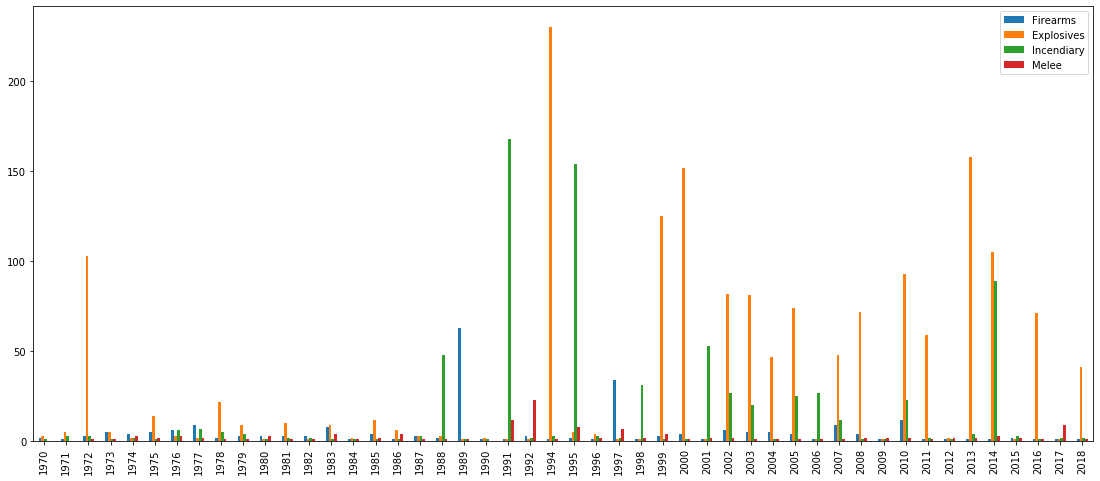

In [44]:
weapons_df[imp_weapons].plot(kind='bar', legend=True,figsize=(19,8))
plt.show()

### South America

In [57]:
df = terror_df[terror_df.region_txt.isin(['South America'])]

In [58]:
dict_weapons = {}
for year, group in df.groupby('iyear'):
    dict_weapons[year] = {}
    for txt in ['weaptype1_txt','weaptype2_txt','weaptype3_txt']:
        weapons = group[txt].value_counts().to_dict()
        for weapon in weapons.keys():
            if weapon not in ['Unknown','Other'] and weapon in dict_weapons:
                dict_weapons[year][weapon] += weapons[weapon]
            elif weapon not in ['Unknown','Other']:
                dict_weapons[year][weapon] = weapons[weapon]

In [59]:
# for k in dict_weapons.keys():
#   dict_weapons[k] = normalize(dict_weapons[k])

weapons_df = pd.DataFrame(dict_weapons).transpose()
weapons_df.fillna(0,inplace=True)
weapons_df.head()

,Firearms,Explosives,Incendiary,Sabotage Equipment,Melee,Chemical,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",Fake Weapons,Biological
1970,4.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1971,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1972,5.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1973,1.0,24.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1974,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
imp_weapons = weapons_df.columns[weapons_df.sum() > 90] # We keep only the weapons that are the more present
# weapons_df.sum()

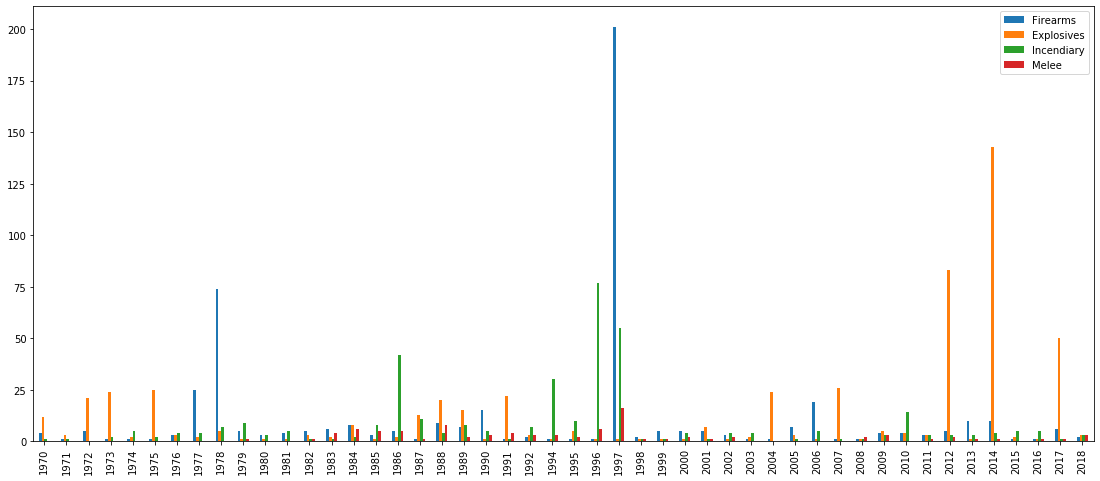

In [64]:
weapons_df[imp_weapons].plot(kind='bar', legend=True,figsize=(19,8))
plt.show()

### South Asia

In [65]:
df = terror_df[terror_df.region_txt.isin(['South Asia'])]

In [66]:
dict_weapons = {}
for year, group in df.groupby('iyear'):
    dict_weapons[year] = {}
    for txt in ['weaptype1_txt','weaptype2_txt','weaptype3_txt']:
        weapons = group[txt].value_counts().to_dict()
        for weapon in weapons.keys():
            if weapon not in ['Unknown','Other'] and weapon in dict_weapons:
                dict_weapons[year][weapon] += weapons[weapon]
            elif weapon not in ['Unknown','Other']:
                dict_weapons[year][weapon] = weapons[weapon]

In [67]:
# for k in dict_weapons.keys():
#   dict_weapons[k] = normalize(dict_weapons[k])

weapons_df = pd.DataFrame(dict_weapons).transpose()
weapons_df.fillna(0,inplace=True)
weapons_df.head()

,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",Explosives,Firearms,Incendiary,Melee,Sabotage Equipment,Chemical,Fake Weapons,Biological
1970,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1972,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1974,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1975,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
imp_weapons = weapons_df.columns[weapons_df.sum() > 90] # We keep only the weapons that are the more present

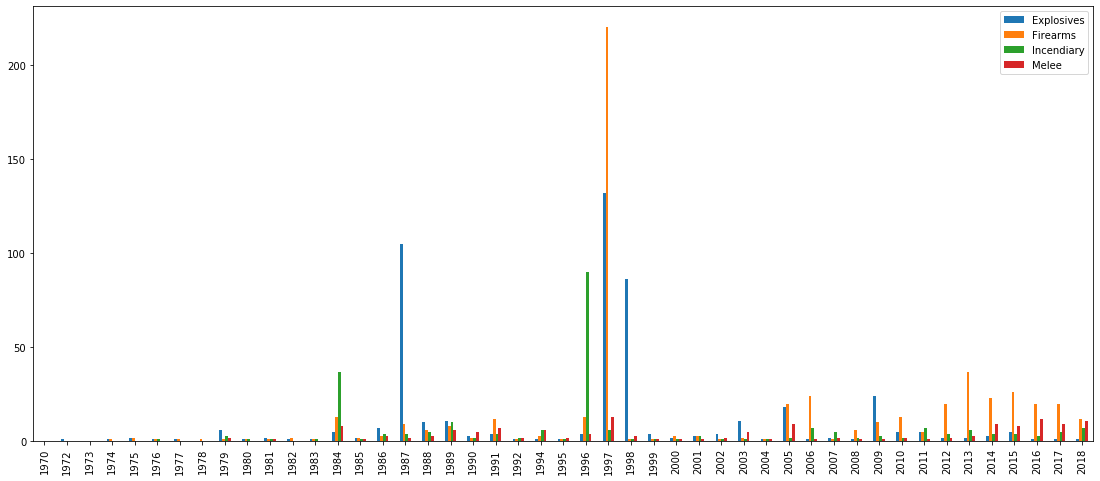

In [70]:
weapons_df[imp_weapons].plot(kind='bar', legend=True,figsize=(19,8))
plt.show()

### Middle East & North Africa

In [71]:
df = terror_df[terror_df.region_txt.isin(['Middle East & North Africa'])]

In [72]:
dict_weapons = {}
for year, group in df.groupby('iyear'):
    dict_weapons[year] = {}
    for txt in ['weaptype1_txt','weaptype2_txt','weaptype3_txt']:
        weapons = group[txt].value_counts().to_dict()
        for weapon in weapons.keys():
            if weapon not in ['Unknown','Other'] and weapon in dict_weapons:
                dict_weapons[year][weapon] += weapons[weapon]
            elif weapon not in ['Unknown','Other']:
                dict_weapons[year][weapon] = weapons[weapon]

In [73]:
# for k in dict_weapons.keys():
#   dict_weapons[k] = normalize(dict_weapons[k])

weapons_df = pd.DataFrame(dict_weapons).transpose()
weapons_df.fillna(0,inplace=True)
weapons_df.head()

,Explosives,Firearms,Incendiary,Melee,Chemical,Fake Weapons,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",Sabotage Equipment,Biological
1970,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1971,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1972,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1973,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1974,3.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
imp_weapons = weapons_df.columns[weapons_df.sum() > 90] # We keep only the weapons that are the more present

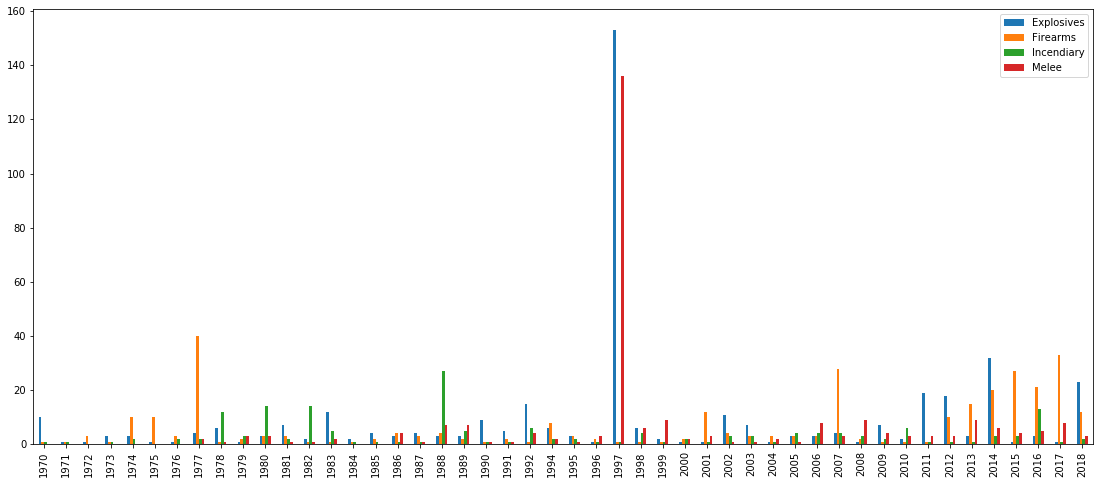

In [78]:
weapons_df[imp_weapons].plot(kind='bar', legend=True,figsize=(19,8))
plt.show()

## Type of attack

### North America

In [79]:
df = terror_df[terror_df.region_txt.isin(['North America'])]

In [83]:
dict_attack = {}
for year, group in df.groupby('iyear'):
    dict_attack[year] = {}
    for txt in ['attacktype1_txt','attacktype2_txt','attacktype3_txt']:
        attacks = group[txt].value_counts().to_dict()
        for attack in attacks.keys():
            if attack not in ['Unknown','Other'] and attack in dict_weapons:
                dict_attack[year][attack] += attacks[attack]
            elif attack not in ['Unknown','Other']:
                dict_attack[year][attack] = attacks[attack]

In [84]:
# for k in dict_attack.keys():
#   dict_attack[k] = normalize(dict_attack[k])

attacks_df = pd.DataFrame(dict_attack).transpose()
attacks_df.fillna(0,inplace=True)
attacks_df.head()

,Bombing/Explosion,Facility/Infrastructure Attack,Armed Assault,Assassination,Hostage Taking (Kidnapping),Hijacking,Unarmed Assault,Hostage Taking (Barricade Incident)
1970,1.0,2.0,3.0,7.0,5.0,2.0,2.0,0.0
1971,141.0,1.0,21.0,4.0,1.0,1.0,0.0,0.0
1972,40.0,1.0,3.0,9.0,1.0,3.0,0.0,0.0
1973,22.0,2.0,1.0,6.0,6.0,0.0,0.0,1.0
1974,74.0,11.0,13.0,3.0,4.0,0.0,2.0,0.0


In [86]:
imp_attacks = attacks_df.columns[attacks_df.sum() > 100] # We keep only the attacks that are the more present

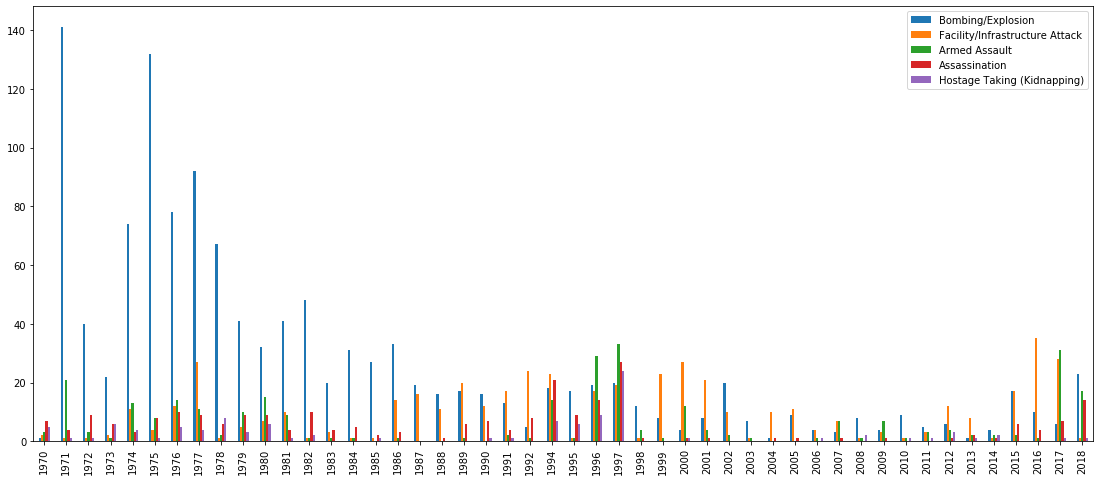

In [87]:
attacks_df[imp_attacks].plot(kind='bar', legend=True,figsize=(19,8))
plt.show()

### South and Center America

In [88]:
df = terror_df[terror_df.region_txt.isin(['Central America & Caribbean','South America'])]

In [89]:
dict_attack = {}
for year, group in df.groupby('iyear'):
    dict_attack[year] = {}
    for txt in ['attacktype1_txt','attacktype2_txt','attacktype3_txt']:
        attacks = group[txt].value_counts().to_dict()
        for attack in attacks.keys():
            if attack not in ['Unknown','Other'] and attack in dict_weapons:
                dict_attack[year][attack] += attacks[attack]
            elif attack not in ['Unknown','Other']:
                dict_attack[year][attack] = attacks[attack]

In [90]:
# for k in dict_attack.keys():
#   dict_attack[k] = normalize(dict_attack[k])

attacks_df = pd.DataFrame(dict_attack).transpose()
attacks_df.fillna(0,inplace=True)
attacks_df.head()

,Hostage Taking (Kidnapping),Bombing/Explosion,Assassination,Facility/Infrastructure Attack,Armed Assault,Hostage Taking (Barricade Incident),Hijacking,Unarmed Assault
1970,23.0,11.0,11.0,11.0,10.0,1.0,1.0,0.0
1971,10.0,3.0,3.0,2.0,10.0,0.0,0.0,0.0
1972,5.0,11.0,16.0,0.0,2.0,0.0,0.0,0.0
1973,27.0,21.0,13.0,5.0,8.0,1.0,3.0,1.0
1974,19.0,50.0,11.0,2.0,4.0,2.0,0.0,0.0


In [92]:
imp_attacks = attacks_df.columns[attacks_df.sum() > 1000] # We keep only the attacks that are the more present

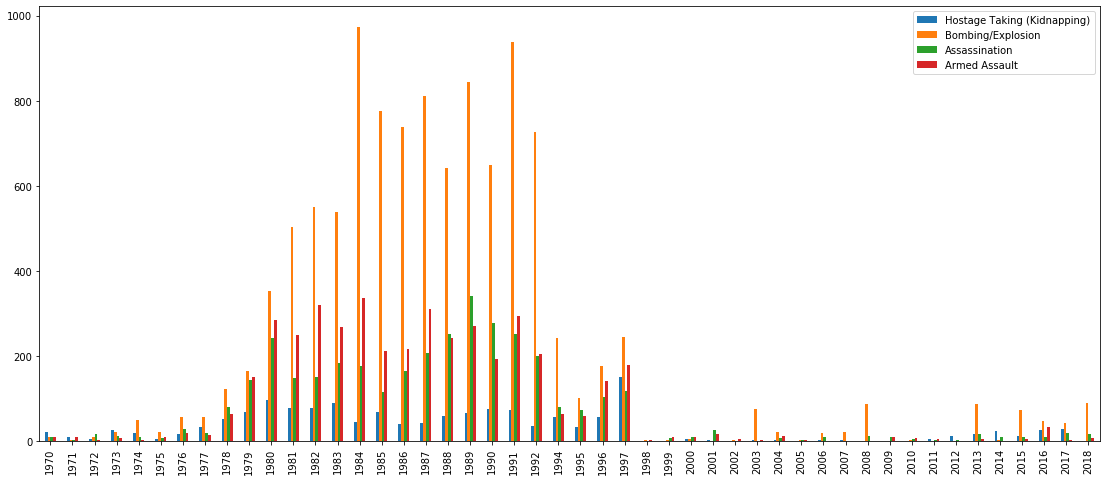

In [94]:
attacks_df[imp_attacks].plot(kind='bar', legend=True,figsize=(19,8))
plt.show()

### Africa

In [97]:
df = terror_df[terror_df.region_txt.isin(['Sub-Saharan Africa','Middle East & North Africa'])]

In [98]:
dict_attack = {}
for year, group in df.groupby('iyear'):
    dict_attack[year] = {}
    for txt in ['attacktype1_txt','attacktype2_txt','attacktype3_txt']:
        attacks = group.attacktype1_txt.value_counts().to_dict()
        for attack in attacks.keys():
            if attack not in ['Unknown','Other'] and attack in dict_weapons:
                dict_attack[year][attack] += attacks[attack]
            elif attack not in ['Unknown','Other']:
                dict_attack[year][attack] = attacks[attack]

In [99]:
# for k in dict_attack.keys():
#   dict_attack[k] = normalize(dict_attack[k])

attacks_df = pd.DataFrame(dict_attack).transpose()
attacks_df.fillna(0,inplace=True)
attacks_df.head()

,Bombing/Explosion,Hostage Taking (Kidnapping),Armed Assault,Hostage Taking (Barricade Incident),Facility/Infrastructure Attack,Hijacking,Assassination,Unarmed Assault
1970,10.0,5.0,3.0,2.0,1.0,1.0,0.0,0.0
1971,25.0,4.0,6.0,0.0,1.0,3.0,1.0,0.0
1972,23.0,0.0,1.0,1.0,0.0,5.0,23.0,0.0
1973,14.0,2.0,2.0,1.0,0.0,1.0,2.0,0.0
1974,28.0,5.0,3.0,2.0,1.0,2.0,4.0,0.0


In [101]:
imp_attacks = attacks_df.columns[attacks_df.sum() > 1000] # We keep only the attacks that are the more present

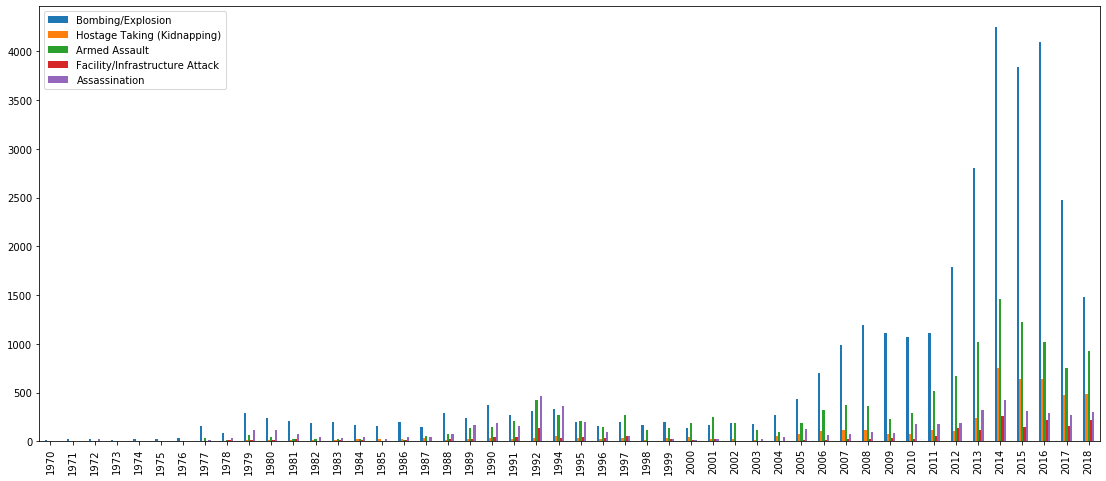

In [102]:
attacks_df[imp_attacks].plot(kind='bar', legend=True,figsize=(19,8))
plt.show()

### Western Europe

In [103]:
df = terror_df[terror_df.region_txt.isin(['Western Europe'])]

In [104]:
dict_attack = {}
for year, group in df.groupby('iyear'):
    dict_attack[year] = {}
    for txt in ['attacktype1_txt','attacktype2_txt','attacktype3_txt']:
        attacks = group.attacktype1_txt.value_counts().to_dict()
        for attack in attacks.keys():
            if attack not in ['Unknown','Other'] and attack in dict_weapons:
                dict_attack[year][attack] += attacks[attack]
            elif attack not in ['Unknown','Other']:
                dict_attack[year][attack] = attacks[attack]

In [105]:
# for k in dict_attack.keys():
#   dict_attack[k] = normalize(dict_attack[k])

attacks_df = pd.DataFrame(dict_attack).transpose()
attacks_df.fillna(0,inplace=True)
attacks_df.head()

,Bombing/Explosion,Armed Assault,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Kidnapping),Unarmed Assault,Assassination,Hostage Taking (Barricade Incident)
1970,15.0,15.0,8.0,6.0,3.0,1.0,0.0,0.0
1971,44.0,4.0,6.0,1.0,3.0,0.0,24.0,0.0
1972,76.0,16.0,2.0,3.0,6.0,0.0,141.0,0.0
1973,65.0,21.0,20.0,4.0,3.0,2.0,92.0,3.0
1974,107.0,20.0,25.0,0.0,4.0,2.0,110.0,1.0


In [107]:
imp_attacks = attacks_df.columns[attacks_df.sum() > 1000] # We keep only the attacks that are the more present

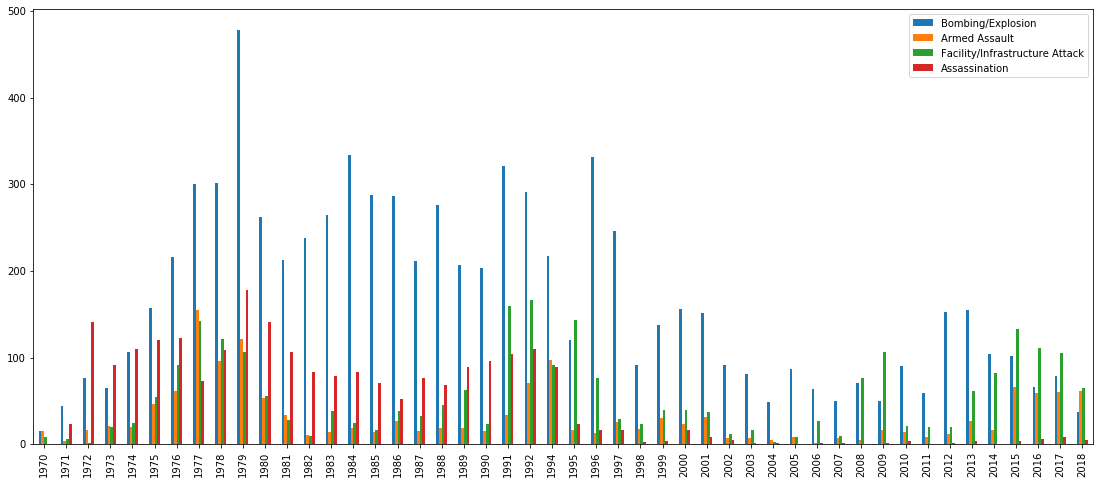

In [109]:
attacks_df[imp_attacks].plot(kind='bar', legend=True,figsize=(19,8))
plt.show()

## Terrorist groups

In [114]:
dict_gname = {}
for year, group in terror_df.groupby('iyear'):
    dict_gname[year] = {}
    for txt in ['gname']:
        gnames = group[txt].value_counts().to_dict()
        del gnames['Unknown']
        dict_gname[year] = max(gnames, key=gnames.get)

dict_gname

{1970: 'Left-Wing Militants',
 1971: 'Left-Wing Militants',
 1972: 'Black September',
 1973: 'Irish Republican Army (IRA)',
 1974: 'Irish Republican Army (IRA)',
 1975: 'Irish Republican Army (IRA)',
 1976: 'Irish Republican Army (IRA)',
 1977: 'Irish Republican Army (IRA)',
 1978: 'Basque Fatherland and Freedom (ETA)',
 1979: 'Irish Republican Army (IRA)',
 1980: 'Farabundo Marti National Liberation Front (FMLN)',
 1981: 'Farabundo Marti National Liberation Front (FMLN)',
 1982: 'Shining Path (SL)',
 1983: 'Shining Path (SL)',
 1984: 'Shining Path (SL)',
 1985: 'Farabundo Marti National Liberation Front (FMLN)',
 1986: 'Shining Path (SL)',
 1987: 'Shining Path (SL)',
 1988: 'Farabundo Marti National Liberation Front (FMLN)',
 1989: 'Shining Path (SL)',
 1990: 'Shining Path (SL)',
 1991: 'Shining Path (SL)',
 1992: "Kurdistan Workers' Party (PKK)",
 1994: 'Irish Republican Army (IRA)',
 1995: "Kurdistan Workers' Party (PKK)",
 1996: 'Liberation Tigers of Tamil Eelam (LTTE)',
 1997: 'Re

### Africa

In [170]:
dict_attack = {}
for year, group in afr_terror_df.groupby('iyear'):
    dict_gname[year] = {}
    for txt in ['gname']:
      gnames = group[txt].value_counts().to_dict()
      del gnames['Unknown']
      dict_gname[year] = max(gnames, key=gnames.get)

dict_gname

{1970: 'Popular Front for the Liberation of Palestine (PFLP)',
 1971: "Turkish People's Liberation Army",
 1972: 'Black September',
 1973: 'Black September',
 1974: 'Arab Communist Organization',
 1975: 'Mujahedin-e Khalq (MEK)',
 1976: "Turkish People's Liberation Army",
 1977: 'African National Congress (South Africa)',
 1978: 'Palestinians',
 1979: 'Palestinians',
 1980: 'Palestinians',
 1981: 'African National Congress (South Africa)',
 1982: 'Palestinians',
 1983: 'African National Congress (South Africa)',
 1984: 'African National Congress (South Africa)',
 1985: 'African National Congress (South Africa)',
 1986: 'African National Congress (South Africa)',
 1987: 'African National Congress (South Africa)',
 1988: 'African National Congress (South Africa)',
 1989: 'Palestinians',
 1990: 'National Union for the Total Independence of Angola (UNITA)',
 1991: 'Dev Sol',
 1992: "Kurdistan Workers' Party (PKK)",
 1994: "Al-Gama'at al-Islamiyya (IG)",
 1995: "Al-Gama'at al-Islamiyya (IG)

## Ratio kills/attacks

In [49]:
dict_nb_attacks = {}
for year, group in terror_df.groupby('iyear'):
    nb_attacks = len(group)
    dict_nb_attacks[year] = nb_attacks

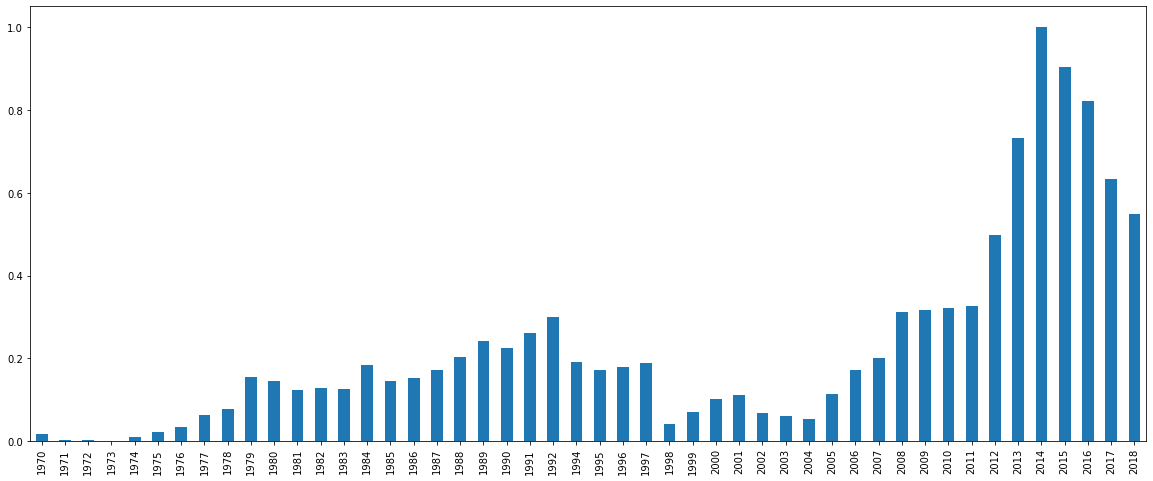

In [51]:
nb_attacks_df = pd.Series(dict_nb_attacks)
nb_attacks_df = (nb_attacks_df - nb_attacks_df.min())/(nb_attacks_df.max() - nb_attacks_df.min())
nb_attacks_df.plot.bar(figsize=(20,8))
plt.show()

In [53]:
dict_ratio = {}
for year, group in terror_df.groupby('iyear'):
    nb_kills = group.nkill.sum()
    nb_attacks = len(group)
    ratio = nb_kills/nb_attacks
    dict_ratio[year] = ratio

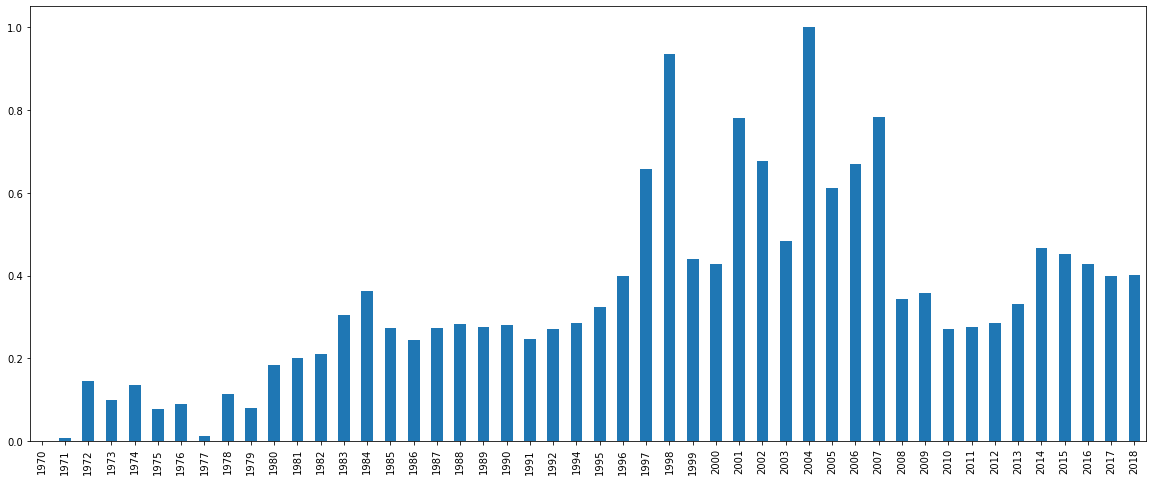

In [54]:
ratio_df = pd.Series(dict_ratio)
ratio_df = (ratio_df - ratio_df.min())/(ratio_df.max() - ratio_df.min())
ratio_df.plot.bar(figsize=(20,8))
plt.show()

In [63]:
list_years = [year for year in ratio_df.keys()]
list_ratio = [ratio for ratio in ratio_df.values]
list_attacks = [attacks for attacks in nb_attacks_df.values]
dict_both = {'year' : list_years, 'ratio' : list_ratio, 'attacks' : list_attacks}
both_df = pd.DataFrame(dict_both).set_index('year')

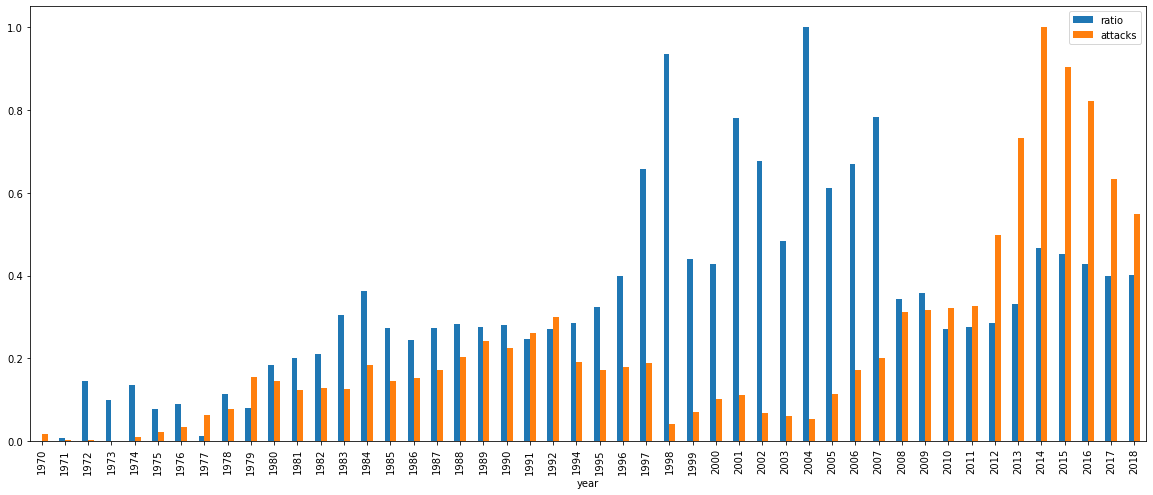

In [65]:
both_df.plot.bar(figsize=(20,8))
plt.show()

## Target victim

In [ ]:
target_victim = terror_df.targtype1_txt.unique().tolist()
del target_victim[target_victim.index('Unknown')]
del target_victim[target_victim.index('Other')]

dict_target = {}
for year, group in terror_df.groupby('iyear'):
    dict_target[year] = {}
    targets = group.targtype1_txt.value_counts().to_dict()
    for target in target_victim:
        if target in targets.keys():
            dict_target[year][target] = targets[target]
        else:
            dict_target[year][target] = 0

In [ ]:
target_df = pd.DataFrame(dict_target).transpose()
target_df.head()

,Private Citizens & Property,Government (Diplomatic),Journalists & Media,Police,Utilities,Military,Government (General),Airports & Aircraft,Business,Educational Institution,Violent Political Party,Religious Figures/Institutions,Transportation,Tourists,NGO,Telecommunication,Food or Water Supply,Terrorists/Non-State Militia,Maritime,Abortion Related
1970,56,55,9,81,16,62,80,25,136,62,1,13,2,2,8,7,2,4,0,0
1971,23,35,12,38,12,40,46,10,130,40,2,4,4,3,2,3,0,0,2,0
1972,152,75,5,26,7,10,27,22,75,6,1,0,3,4,5,0,0,5,1,0
1973,125,57,3,29,5,9,22,20,82,5,0,2,2,0,2,0,0,9,3,0
1974,129,58,9,41,5,9,36,20,177,3,0,7,7,0,3,4,0,9,2,0


In [ ]:
most_target = target_df.sum().sort_values(ascending=False) > 1000 # We keep only the targets that are the more present
imp_targets = [target for target, imp in most_target.items() if imp]
slice1 = imp_targets[:4]
slice2 = imp_targets[4:8]
slice3 = imp_targets[8:12]
slice4 = imp_targets[12:16]


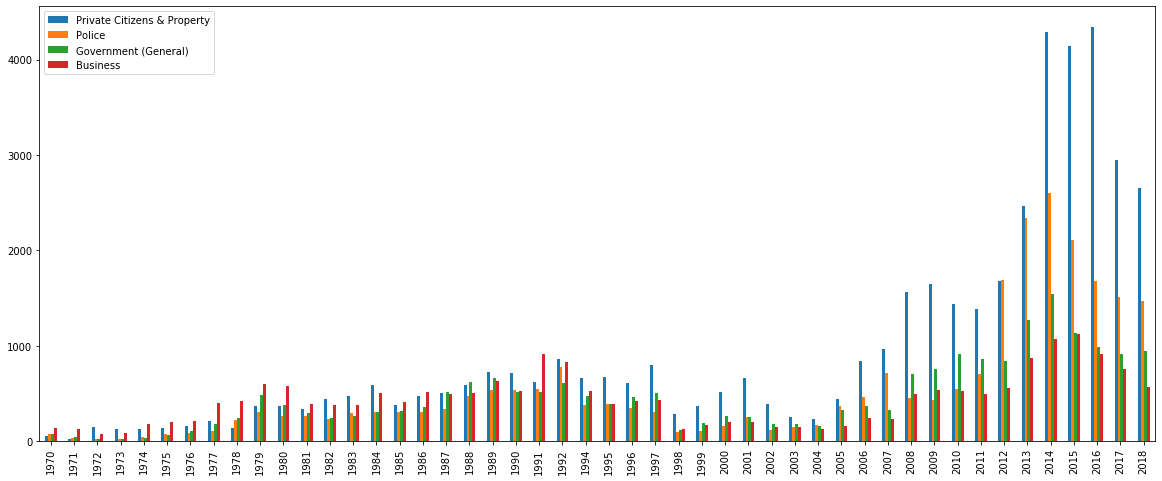

In [ ]:
target_df[slice1].plot.bar(figsize=(20,8))
plt.show()

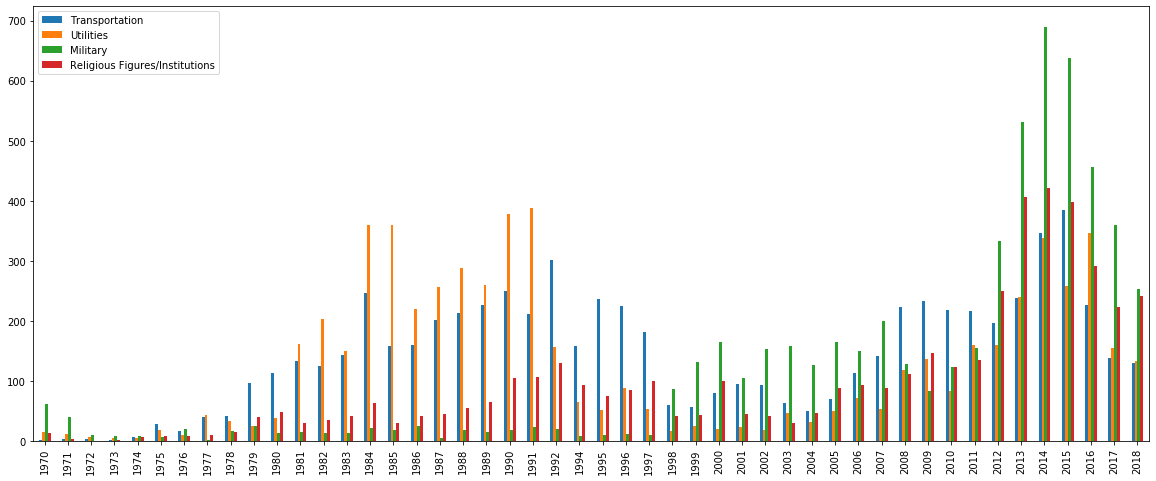

In [ ]:
target_df[slice2].plot.bar(figsize=(20,8))
plt.show()

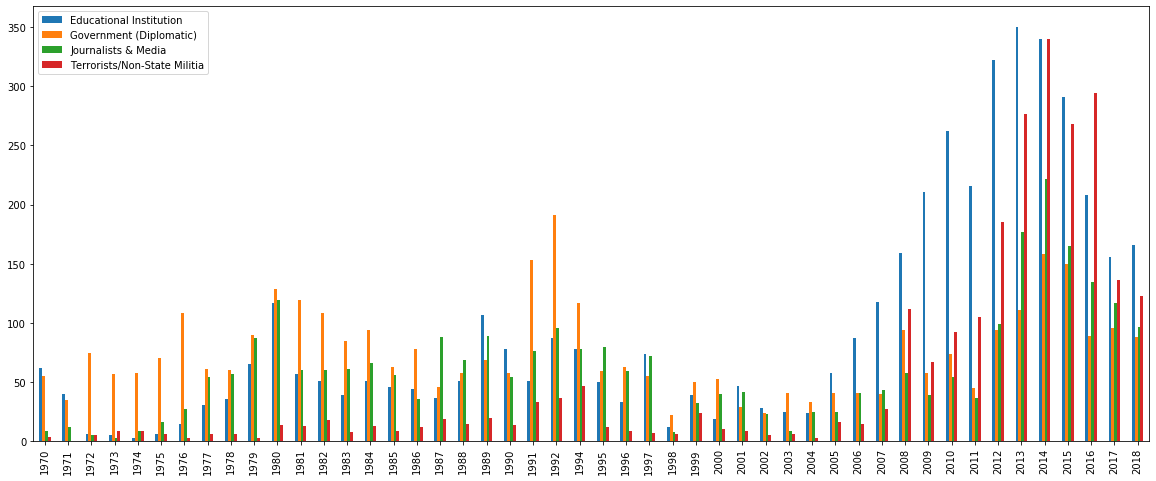

In [ ]:
target_df[slice3].plot.bar(figsize=(20,8))
plt.show()

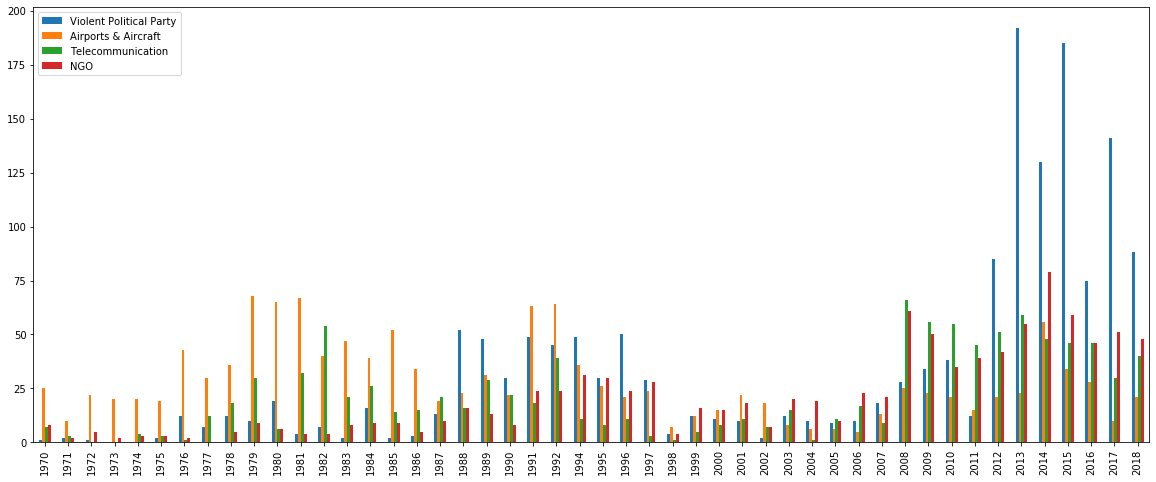

In [ ]:
target_df[slice4].plot.bar(figsize=(20,8))
plt.show()

## INTERRESTING TO LOOK AT MOTIVE
This field may also include general information about the political, social, or economic climate at the time of the attack if considered relevant to the motivation underlying the incident

In [12]:
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [13]:
# terrorism_df = pd.read_csv('data/terrorism_complete.csv',low_memory=False)
# terror_df = terrorism_df[terrorism_df.crit1.isin([1])&terrorism_df.crit2.isin([1])&terrorism_df.crit3.isin([1])]

In [14]:
# wordcloud_terror_df = terror_df[['motive','iyear','region_txt']]

In [15]:
wordcloud_terror_df = pd.read_csv('data/wordcloud_terror_df.csv')

In [16]:
from collections import defaultdict
import nltk
from collections import OrderedDict
import operator
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
stop_words.add('unknown')
stop_words.add('motive')
stop_words.add('specific')
stop_words.add('however')

rof = ['North America','South Asia', 'Middle East & North Africa', 'South America','Western Europe'] # regions of interrest
bag_of_words = {}
for region in rof:
    bag_of_words[region] = {}
    df = wordcloud_terror_df[wordcloud_terror_df.region_txt == region]
    for year, group in df.groupby('iyear'):
        word_dict  = defaultdict(int)
        for txt in group.motive.dropna():
            res = re.findall(r'\w+',txt) 
            for word in res:
                if word.lower() not in stop_words:
                    word_dict[word.lower()] += 1
                    
        bag_of_words[region][year] = OrderedDict(sorted(word_dict.items(), key=operator.itemgetter(1),reverse=True)[:100])

[nltk_data] Downloading package stopwords to /home/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
bag_of_words.keys()

dict_keys(['North America', 'South Asia', 'Middle East & North Africa', 'South America', 'Western Europe'])

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def word_cloud(dict_,region):
    for year in dict_[region].keys():
        if len(dict_[region][year]) > 0:
            print(year)
            wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate_from_frequencies(dict_[region][year])
            plt.figure()
            plt.imshow(wordcloud, interpolation="bilinear")
            plt.axis("off")
            plt.show()

In [19]:
def group_decade(dict_,region,decade):
    dict_region = dict_[region]
    dict_decade = defaultdict(int)
    for year in dict_region.keys():
        if year%100 >= decade and year%100 < decade+10:
            for word, freq in  dict_region[year].items():
                dict_decade[word] += freq
    return dict_decade

In [20]:
def simple_wordcloud(dict_complete,region,decade,imagename):
    ##Cell to test some visualization trials
    #Load the text to be displayed in the Word Map
#     text = str(array)
    # Load the image that we'll be used as a mask
    dict_ = group_decade(dict_complete,region,decade)
    if len(dict_) > 0:
        mask = np.array(Image.open(imagename))
        wc = WordCloud(background_color="white", max_words=2000, mask=mask,contour_width=0, contour_color='steelblue').generate_from_frequencies(dict_)
        # Generate word cloud
    #     wc.generate(text)
        # Show the word cloud
#         plt.figure(figsize = (30,10))
#         plt.imshow(wc, interpolation='bilinear')
#         plt.axis("off")
#         saved_name = imagename[:-4]
# #         plt.imsave(saved_name+'_simlpy_worded.png',wc)
#         plt.show()
        return wc

In [40]:
%%capture
%matplotlib inline
from ipywidgets import interact, widgets
from IPython.display import display
import matplotlib.pyplot as plt

def f(region,decade):
#     with warnings.catch_warnings():
#         warnings.simplefilter("ignore")
    decade = int(decade)
    dict_image = {'North America' : 'image/north_america.png', 
                  'South Asia' : 'image/south_asia.jpg', 
                  'Middle East & North Africa' : 'image/africa_north.png', 
                  'South America' : 'image/south_america.jpg' , 
                  'Western Europe' : 'image/western_europe.jpeg'}
    wc = simple_wordcloud(bag_of_words,region,decade,dict_image[region])
#     img_median = rank.median(img_gray, selem=selem) 

    ax_neu.imshow(wc, interpolation='bilinear')
    fig.canvas.draw()
    display(fig)

fig = plt.figure(figsize=(18, 12))
# ax_orig = fig.add_subplot(121) 
ax_neu = fig.add_subplot(111) 

# ax_orig.imshow(img_gray, cmap="gray")
ax_neu.imshow(img_gray, cmap="gray")

In [43]:
region_w = widgets.Dropdown(
    options=['North America', 'South Asia', 'Middle East & North Africa', 'South America' , 'Western Europe'],
    value='North America',
    description='Region:',
)
decade_w = widgets.SelectionSlider(
    options=['70', '75', '80','85','90','95','00','05','10'],
    value='70',
    description='Decade:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

interact(f, region=region_w,decade=decade_w);

interactive(children=(Dropdown(description='Region:', options=('North America', 'South Asia', 'Middle East & N…

In [44]:
# simple_wordcloud(bag_of_words,'Middle East & North Africa',85,'image/africa_north.png')

## Damage in USD

In [ ]:
dict_ratio_damage = {}
terror_df = pd.read_excel('../terror_df.xlsx')
for year, group in terror_df.groupby('iyear'):
    dammage_value = group.propvalue.sum()
    nb_attacks = len(group)
    ratio = dammage_value/nb_attacks
    dict_ratio_damage[year] = ratio

In [ ]:
ratio_dam_df = pd.Series(dict_ratio_damage)
ratio_dam_df = (ratio_dam_df - ratio_dam_df.min())/(ratio_dam_df.max() - ratio_dam_df.min())
ratio_dam_df.plot.bar(figsize=(20,8))
plt.show()